# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
data=pd.read_csv('/datasets/real_estate_data.csv',sep = '\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

промежуточный вывод:
first_day_exposition - object - должен быть тип datetime
ceiling_height - нулевые значения
floors_total - должен быть тип int, т.к. количество этажей - целое значение + нулевые значения
is_apartment - должен быть тип bool + нулевые значения
living_area - нулевые значения
kitchen_area - нулевые значения
balcony - нулевые значения
locality_name - нулевые значения
airports_nearest - нулевые значения
cityCenters_nearest - нулевые значения
parks_around3000 - тип должен быть int + нулевые значения
parks_nearest - нулевые значения
ponds_around3000 - тип должен быть int + нулевые значения
ponds_nearest - нулевые значения
days_exposition - тип должен быть int + нулевые значения

### Предобработка данных

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

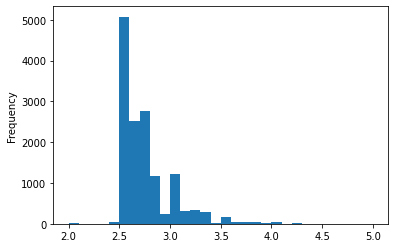

In [2]:
data['total_images'].value_counts()
data['last_price'].value_counts() #изменим цену на тип int
data['total_area'].value_counts()
data['first_day_exposition'].count() #должен быть тип datetime, а по факту object + не указано время, но в данном случае это не важно
data['rooms'].value_counts()
data['ceiling_height'].value_counts() #пропущенные значения
data['floors_total'].value_counts() #посмотрим данные с пропущенными значениями в floors_total- ничего общего между ними нет, оставим как есть
data['living_area'].value_counts()# слишком много знаков после запятой и есть пропущенные значения
data['floor'].value_counts()
data['is_apartment'].value_counts() #пропущенные значения
data['studio'].value_counts()
data['open_plan'].value_counts()
data['kitchen_area'].value_counts()
data['balcony'].value_counts() #пропущенные значения, поменяем тип данныйх на int
data['locality_name'].value_counts() #пропущенные значения не будем трогать, причина пропуска не понятна
data['airports_nearest'].value_counts()
data['cityCenters_nearest'].value_counts()
data['parks_around3000'].value_counts()
data['parks_nearest'].value_counts()
data['ponds_around3000'].value_counts()
data['ponds_nearest'].value_counts()
data['days_exposition'].value_counts() #тип должен быть int + нулевые значения

data['days_exposition'] = data['days_exposition'].fillna(data['days_exposition'].mean()).astype('int')#изменили для удобства просмотра данных

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')

data['balcony'] = data['balcony'].fillna(0)
data['balcony'] = data['balcony'].astype('int') #изменили для удобства просмотра данных

data['ceiling_height'].sort_values().plot(y = 'ceiling_height', kind = 'hist', bins = 30, range=(2,5))
data['ceiling_height'].describe()
data[data['ceiling_height'] > 4].sort_values('ceiling_height').tail(20)

data['is_apartment'] = data['is_apartment'].fillna(False)

data['last_price'] = data['last_price'].astype('int') #изменили для удобства просмотра данных

data[data['floors_total'].isna()]

data['living_area'].describe()

#межуточный вывод:
#first_day_exposition - object - должен быть тип datetime
#ceiling_height - нулевые значения
#floors_total - должен быть тип int, т.к. количество этажей - целое значение + нулевые значения
#is_apartment - должен быть тип bool + нулевые значения
#living_area - нулевые значения
#kitchen_area - нулевые значения
#balcony - нулевые значения
#locality_name - нулевые значения
#airports_nearest - нулевые значения
#cityCenters_nearest - нулевые значения
#parks_around3000 - тип должен быть int + нулевые значения
#parks_nearest - нулевые значения
#ponds_around3000 - тип должен быть int + нулевые значения
#ponds_nearest - нулевые значения
#days_exposition - тип должен быть int + нулевые значения

### Посчитайте и добавьте в таблицу новые столбцы

In [3]:
#посчитаем цену квадратного метра
data['price_per_square_meter'] = data['last_price'] / data['total_area']

#изменили тип данных для более удобного просмотра
data['price_per_square_meter'] = data['price_per_square_meter'].astype('int')

#создаем столбец дня недели
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday

#создаем столбец месяца
data['month_exposition'] = data['first_day_exposition'].dt.month

#создаем столбец года
data['year_exposition'] = data['first_day_exposition'].dt.year

#напишем функцию категоризации по этажам, используя метод apply применимо к каждой строке датафрейма через axis = 1
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'
    
#категоризуем этажи с помощью функции  
data['floor_category'] = data.apply(floor_category, axis = 1)

#перевоим растояния от центра города из м в км
data['cityCenters_nearest_km']=data['cityCenters_nearest']/1000


### Проведите исследовательский анализ данных

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

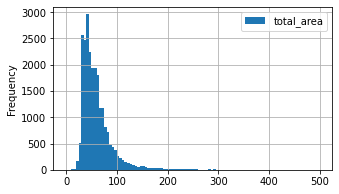

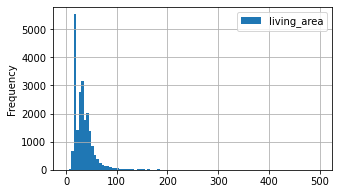

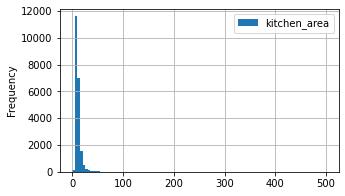

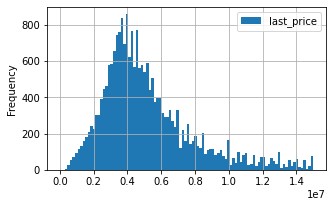

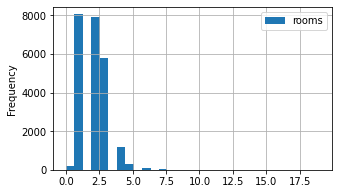

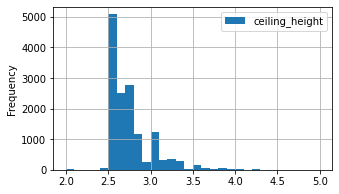

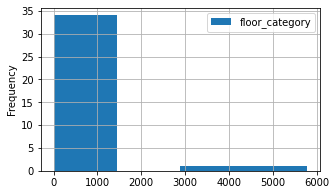

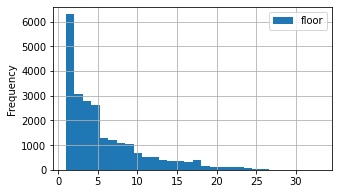

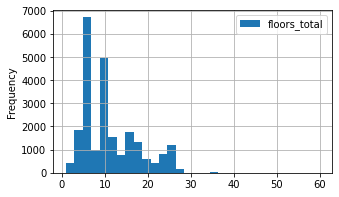

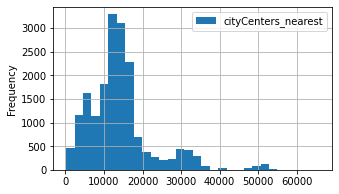

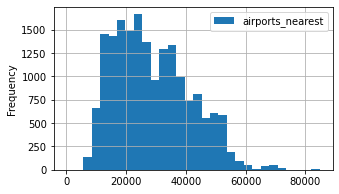

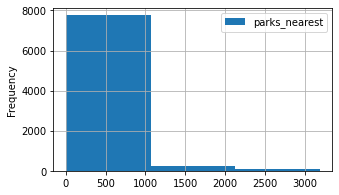

In [4]:
#изучим общую площадь
data.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,500))
data['total_area'].describe()

#изучим жилую площадь
data.plot(y = 'living_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,500))
data['living_area'].describe()

#изучим площадь кухни
data.plot(y = 'kitchen_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,500))
data['kitchen_area'].describe()

#изучим цену
data.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, range = (0,15000000), figsize = (5,3))
data['last_price'].describe()

#изучим число комнат
data.plot(y = 'rooms', kind = 'hist', bins = 30, grid=True, figsize = (5,3))
data['rooms'].describe()

#изучим высоту потолков
data.plot(y = 'ceiling_height', kind = 'hist', bins = 30, range = (2,5), grid=True, figsize = (5,3))
data['ceiling_height'].describe()

# изучим тип этажа квартиры («первый», «последний», «другой»)
floor_category=data.pivot_table(index = 'floors_total', values='floor_category', aggfunc = ['count'])
floor_category.plot(y = 'count', kind = 'hist', bins = 4, grid=True, figsize = (5,3))
floor_category['count'].describe()

#изучим этаж квартиры
data.plot(y = 'floor', kind = 'hist', bins = 30, grid=True, figsize = (5,3))
data['floor'].describe()

#изучим общее количество этажей в доме
data.plot(y = 'floors_total', kind = 'hist', bins = 30, grid=True, figsize = (5,3))
data['floors_total'].describe()

#изучим расстояние до центра города в метрах
data.plot(y = 'cityCenters_nearest', kind = 'hist', bins = 30, grid=True, figsize = (5,3))
data['cityCenters_nearest'].describe()

#изучим расстояние до ближайшего аэропорта
data.plot(y = 'airports_nearest', kind = 'hist', bins = 30, grid=True, figsize = (5,3))
data['airports_nearest'].describe()

#изучим расстояние до ближайшего парка
data.plot(y = 'parks_nearest', kind = 'hist', bins = 3, grid=True, figsize = (5,3))
data['parks_nearest'].describe()


#промежуточный вывод
средняя площадь квартир около 45 - 50 кв.м
средняя жилая площадь квартир около 30 - 40 кв.м
средняя площадь кухни 20кв.м
средняя цена 400к
среднее число комнат 1
срдняя высота потолков 2.5м
средний этаж на котором чаще всего распологаются квартиры квартиры 2 этаж
преобадающитй тип этажа на котором расположена квартира 'другой'
среднее общее количество этажей в доме 5 этажей
среднее расстояние до центра города в метрах 11 км
cреднее расстояние до ближайшего аэропорта 22 км
среднее расстояние до ближайшего парка 1 км

<AxesSubplot:xlabel='cityCenters_nearest_km'>

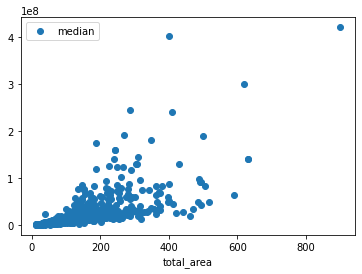

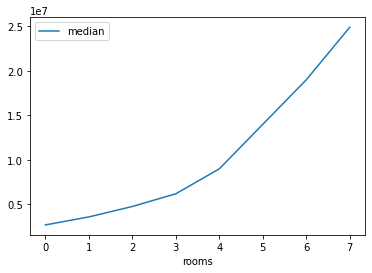

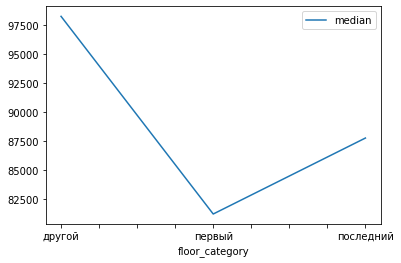

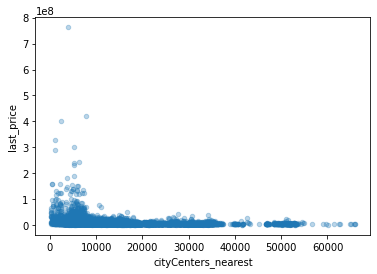

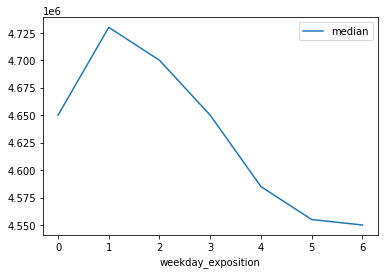

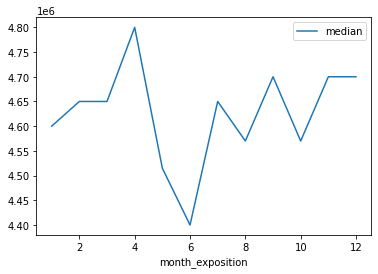

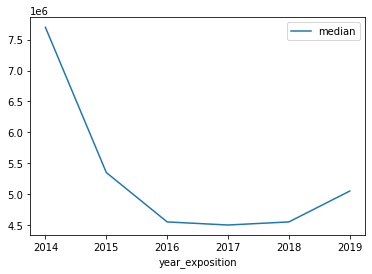

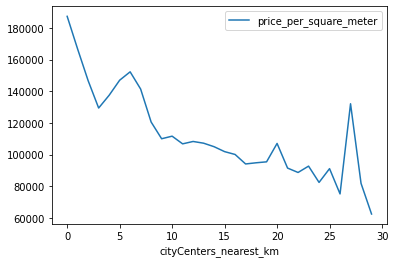

In [5]:
#Изучим зависимость цены квартиры от общей площади квартиры.
pivot_table_total_area = data.pivot_table(index = 'total_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area.columns = ['mean', 'count', 'median']
pivot_table_total_area.plot(y = 'median', style = 'o')

pivot_table_total_area.sort_values('median', ascending = False)

data['total_area'].corr(data['last_price'])
#промежуточный вывод:зависимость есть, но не значительная. В основном все значения похожи друг на друга и различия находятся на уровне погрешности  

#Изучим зависимость цены квартиры от числа комнат.
pivot_table_rooms = data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_rooms.columns = ['mean', 'count', 'median']
pivot_table_rooms.query('count > 50').plot(y = 'median')

pivot_table_rooms.query('count > 50').sort_values('median', ascending = False)

data['rooms'].corr(data['last_price'])
#промежуточный вывод: чем ближе количество комнат к 3 тем ниже стоимость квартиры

#Изучим зависимость цены квартиры от этажа (первого,среднего и последнего).
pivot_table_floor_category = data.pivot_table(index = 'floor_category', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_floor_category.columns = ['mean', 'count', 'median']
pivot_table_floor_category.plot(y = 'median')
pivot_table_floor_category
#промежуточный вывод:самая низкая цена на квартиры находящиеся на 'первом' этаже, а самая высокая у квартир находящихся на 'другом этаже'

#Изучим зависимость цены квартиры от удалённости от центра.
data.plot(kind = 'scatter', y = 'last_price', x = 'cityCenters_nearest', alpha = 0.3)

data['cityCenters_nearest'].corr(data['last_price'])
#промежуточный вывод:Чем ближе к центру, тем выше стоимость квартиры

#Изучим зависимость цены квартиры от даты размещения: дня недели.
pivot_table_weekday_exposition = data.pivot_table(index = 'weekday_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_weekday_exposition.columns = ['mean', 'count', 'median']
pivot_table_weekday_exposition.plot(y = 'median')

pivot_table_weekday_exposition.sort_values('median', ascending = False)
#промежуточный вывод:видим, что чем ближе ко вторнику выставлены объявления тем в среднем выше стоимость, но незначительно. По субботам стоимость самая низкая

#Изучим зависимость цены квартиры от даты размещения: месяца.
pivot_table_month_exposition = data.pivot_table(index = 'month_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_month_exposition.columns = ['mean', 'count', 'median']
pivot_table_month_exposition.plot(y = 'median')

pivot_table_month_exposition.sort_values('median', ascending = False)
#промежуточный вывод:самая высокая стоимость квартиры в апреле и июне Самая низкая

#Изучим зависимость цены квартиры от даты размещения: года.
pivot_table_year_exposition = data.pivot_table(index = 'year_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_year_exposition.columns = ['mean', 'count', 'median']
pivot_table_year_exposition.plot(y = 'median')

pivot_table_year_exposition.sort_values('median', ascending = False)
#промежуточный вывод:видим, что с 2014 до 2016 года цена падала, но с 2018 начала увеличиваться

#Изучаем предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделяем квартиры в Санкт-Петербурге
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].fillna(999999)
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].astype('int')
pivot_table_km = data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km !=999999').pivot_table(index = 'cityCenters_nearest_km', values = 'price_per_square_meter', aggfunc = 'mean')
pivot_table_km.plot()
#промежуточный вывод:судя по графику центром считать будем радиус в 3 километра

count    21635.000000
mean       193.479778
std        209.501226
min          1.000000
25%         55.000000
50%        148.000000
75%        218.000000
max       1580.000000
Name: days_exposition, dtype: float64

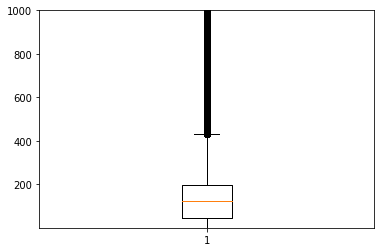

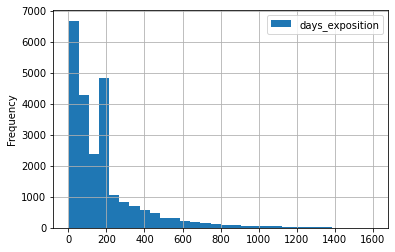

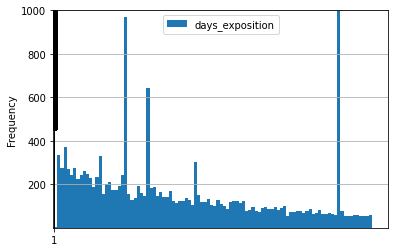

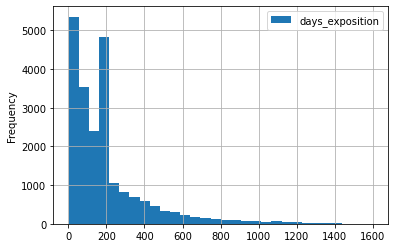

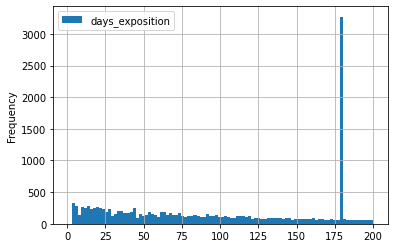

In [6]:
#изучаем как быстро продавались квартиры.
#диаграмма размаха
import matplotlib.pyplot as plt
plt.boxplot(data[data['days_exposition']!=0]['days_exposition'])
plt.ylim(1,1000)

data.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, range = (1,1600))
data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,200))

#среднее значение, медиана и межквартильный размах
data[data['days_exposition']!=0]['days_exposition'].describe()

#отфильтруем данные от аномалий и запишем их в новый датафрейм good_data
good_data = data.query('days_exposition != 45 and days_exposition != 30 and days_exposition != 60 and days_exposition != 90 and days_exposition != 7 and days_exposition != 0')

#диаграмма размаха
plt.boxplot(good_data['days_exposition'])
plt.ylim(1,1000)

#гистограммы
good_data.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, range = (1,1600))
good_data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,200))

#среднее значение, медиана и межквартильный размах
good_data['days_exposition'].value_counts()
good_data['days_exposition'].describe()
#промежуточный вывод:получаем большие значения медианы и среднего значения - 114 и 195 соответственно, вместо 95 и 180. Аналогично, теперь нормальные значения располагаются от 1 до 600 дней вместо от 1 до 500 дней.

промежуточный вывод: после избаувления от аномалий:получаем большие значения медианы и среднего значения - 114 и 195 соответственно, вместо 95 и 180. Аналогично, теперь нормальные значения располагаются от 1 до 600 дней вместо от 1 до 500 дней.
 исходя из полученных данных можно сказать, что быстрые продажи это продажи которые занимают меннее 55 дней.
 медленные продажи это продажи занимающие более 148 дней 
 в среднем продажи занимаю 148 дней 

In [7]:
#Выбираем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах.
locality_pivot_table = data.pivot_table(index = 'locality_name', values = 'price_per_square_meter', aggfunc=['count', 'mean'])
locality_pivot_table.columns = ['count', 'mean']
locality_pivot_table = locality_pivot_table.sort_values('count', ascending = False).head(10)
print(locality_pivot_table)
#самая высокая стоимость
maximum=locality_pivot_table[locality_pivot_table['mean']==locality_pivot_table['mean'].max()]
print('самая высокая стоимость:',maximum['mean'])
#самая низкая стоимость
minimum=locality_pivot_table[locality_pivot_table['mean']==locality_pivot_table['mean'].min()]
print('самая низкая стоимость:',minimum['mean'])

                   count           mean
locality_name                          
Санкт-Петербург    15721  114848.565231
посёлок Мурино       522   85751.733716
посёлок Шушары       440   78676.904545
Всеволожск           398   68654.007538
Пушкин               369  103125.373984
Колпино              338   75424.150888
посёлок Парголово    327   90175.489297
Гатчина              307   68745.693811
деревня Кудрово      299   92473.086957
Выборг               237   58141.489451
самая высокая стоимость: locality_name
Санкт-Петербург    114848.565231
Name: mean, dtype: float64
самая низкая стоимость: locality_name
Выборг    58141.489451
Name: mean, dtype: float64


промежуточный вывод:самая высокая стоимость жилья из 10 населённых пунктов с самым большим количеством объявлений в Санкт-Петербурге, тогда как самая низкая стоимость в Выборге.

я подумал, что 'другой этаж' нет смысла брать в расчеты, по сколько для расчета достаточно знать стоимость на первом и последнем этаже,но когда попробовал сделать исследование с учетом 'другого'этажа картина стала совершенно другой, что для меня стало удивлением. Учту это на будующее

### Общий вывод

Мы обработали полученный архив данных - обработали пропущенные значения там, где это необходимо, заменили типы данных на необходимые для удобной работы. Посчитали и добавили в таблицу цену жилья, вывели из даты дни недели, месяцы и года размещения объявлений, добавили категории по этажам квартир. Изучили следующие параметры на наличие выбивающихся значений - площадь, цена, число комнат, высота потолков этажи на которых распологались квартиры, общее количество этажей в доме, расстояние до центра города,расстояние до ближайшего аэропорта,парка. Были определены аномалии в данных параметрах.  Мы выявили при помощи диаграммы размаха, что нормальные значения продажи квартир варьируются от 1 до 600 дней среднее время продажи квартиры составило 148 дней. Мы выявили, что на стоимость квартиры больше всего влияют количество комнат, этаж квартиры, близость к центру. Незначительно на стоимость квартиры влияют день, месяц, год размещения и общая площадь. Нужно учитывать, что в 2016-2017 годах стоимость квартир в среднем по рынку была ниже на 10-20 % нежели в 2014. Судя, по резкости изменения цен в зависимости от удаления от центра СПБ, мы выявили центр города в радиусе 3 километров.

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [X]  заполнены пропущенные значения там, где это возможно
- [X]  есть пояснение, какие пропущенные значения обнаружены
- [X]  изменены типы данных
- [X]  есть пояснение, в каких столбцах изменены типы и почему
- [X]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [X]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [X]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [X]  посчитано и добавлено в таблицу: месяц публикации объявления
- [X]  посчитано и добавлено в таблицу: год публикации объявления
- [X]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [X]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [X]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [X]  построены гистограммы для каждого параметра
- [X]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [X]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [X]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [X]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [X]  в каждом этапе есть промежуточные выводы
- [X]  есть общий вывод